In [1]:
## for Deep-learing:
import keras
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM,GRU, Bidirectional,TimeDistributed,LeakyReLU,Flatten,BatchNormalization
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adadelta,Adamax , Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from tensorflow.python.keras.layers.convolutional import Conv1D,MaxPooling1D
from tensorflow.python.framework import ops
from tensorflow.keras import regularizers
#from tensorflow.keras.layers.advanced_activations import LeakyReLU

from sklearn.metrics import accuracy_score, roc_curve, auc



from sklearn.metrics import classification_report,confusion_matrix, precision_score


import pandas as pd
import numpy as np

import matplotlib.pyplot as pyplot

from sklearn.metrics import accuracy_score, roc_curve, auc
#from sklearn.metrics import classification_r

In [2]:
df_blst = pd.read_csv('https://raw.githubusercontent.com/Hany1433/Deep-Learning/master/data.csv')
#df_blst = pd.read_csv('https://raw.githubusercontent.com/Hany1433/Deep-Learning/master/BIOIDENT_data.csv')#https://drive.google.com/open?id=1rO7dVq5Z7XDLmeskjcF1u2irm7lNYc_9

In [ ]:
df_blst

,phone_id,user_id,doc_id,time,action,phone_orian,x_co,y_co,pressure,area_covered,finger_orian
0,0,36,3,1.334890e+12,0,1,272,269,0.21,0.044444,0.0
1,0,36,3,1.334890e+12,2,1,262,271,0.32,0.044444,0.0
2,0,36,3,1.334890e+12,2,1,123,327,0.28,0.044444,0.0
3,0,36,3,1.334890e+12,1,1,123,327,0.28,0.044444,0.0
4,0,36,3,1.334890e+12,0,1,216,298,0.34,0.044444,0.0
...,...,...,...,...,...,...,...,...,...,...,...
912128,0,12,1,1.334990e+12,2,1,290,197,0.56,0.044444,0.0
912129,0,12,1,1.334990e+12,2,1,297,193,0.39,0.044444,0.0
912130,0,12,1,1.334990e+12,2,1,301,190,0.20,0.044444,0.0
912131,0,12,1,1.334990e+12,2,1,302,187,0.14,0.133333,0.0


In [3]:
y_frank=df_blst['user_id'].values
second_s_data=df_blst[['user_id','phone_id','doc_id']]
x_frank= df_blst.drop(columns=['user_id','phone_id','doc_id'])
#x_frank= df_blst.drop(columns=['user_id','phone_id','doc_id'])

In [4]:
# One hot encoding
Y_b=pd.get_dummies(y_frank) 
n_classes_b = Y_b.shape[1]

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing

In [6]:
#Scaling features
mm_X_scaler = MinMaxScaler()
data_X = mm_X_scaler.fit_transform(x_frank)



#Standardize features
standard_scaler = StandardScaler()
data_X = standard_scaler.fit_transform(data_X)

In [7]:
#concatenate data for ssecond stage
#s2=pd.Series([2,3,4],index=['c','d','e'])
#s3=pd.Series([5,6],index=['f','g'])
data_X2=pd.DataFrame(data_X,columns=['time',	'action',	'phone_orian',	'x_co',	'y_co',	'pressure',	'area_covered',	'finger_orian'])
#data_X2=pd.DataFrame(list(zip(*data_X)))
second_data=pd.concat([second_s_data,data_X2],axis=1)

In [ ]:
second_data

,user_id,phone_id,doc_id,time,action,phone_orian,x_co,y_co,pressure,area_covered,finger_orian
0,36,0,3,0.161570,-5.788692,-0.237219,0.990460,-0.506349,-1.234207,-0.720913,-0.128145
1,36,0,3,0.161570,0.208786,-0.237219,0.878163,-0.483705,-0.655575,-0.720913,-0.128145
2,36,0,3,0.161570,0.208786,-0.237219,-0.682756,0.150342,-0.865986,-0.720913,-0.128145
3,36,0,3,0.161570,-2.789953,-0.237219,-0.682756,0.150342,-0.865986,-0.720913,-0.128145
4,36,0,3,0.161570,-5.788692,-0.237219,0.361600,-0.178004,-0.550369,-0.720913,-0.128145
...,...,...,...,...,...,...,...,...,...,...,...
912128,12,0,1,0.597965,0.208786,-0.237219,1.192593,-1.321552,0.606895,-0.720913,-0.128145
912129,12,0,1,0.597965,0.208786,-0.237219,1.271201,-1.366841,-0.287354,-0.720913,-0.128145
912130,12,0,1,0.597965,0.208786,-0.237219,1.316119,-1.400808,-1.286810,-0.720913,-0.128145
912131,12,0,1,0.597965,0.208786,-0.237219,1.327349,-1.434775,-1.602427,0.919483,-0.128145


In [8]:
from sklearn.model_selection import train_test_split # to split the data into two parts
# create training and testing vars

#X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x_frank, Y_b,1, train_size=11480, test_size=4920,stratify=Y_b,shuffle=True)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_X, Y_b, test_size=0.2,stratify=Y_b)

In [ ]:
jhgfhjk
y_train_b_3 = y_train_b.values.reshape((y_train_b.shape[0], 1, y_train_b.shape[1]))
y_test_b_3 = y_test_b.values.reshape((y_test_b.shape[0], 1, y_test_b.shape[1]))

In [9]:
# reshape input to be 3D [samples, timesteps, features]
X_train_b_3 = X_train_b.reshape((X_train_b.shape[0], 1, X_train_b.shape[1]))
X_test_b_3 = X_test_b.reshape((X_test_b.shape[0], 1, X_test_b.shape[1]))


In [10]:
import numpy as np # linear algebra
#convert into numby array
X_train_b=np.array(X_train_b_3)
y_train_b=np.array(y_train_b)


X_test_b=np.array(X_test_b_3)
y_test_b=np.array(y_test_b)

#convert into numby array
X_train_b=X_train_b.astype('float32')
y_train_b=y_train_b.astype('float32')


X_test_b=X_test_b.astype('float32')
y_test_b=y_test_b.astype('float32')

In [ ]:
y_train_b.shape

(729706, 41)

In [11]:
#1-conv1d+LeakyReLU(alpha=0.1)+BatchNormalization(momentum=0.0)+maxpolling+Dropout(0.25))+Dense(200, activity_regularizer=regularizers.l2(0.0005)+LSTM(700)+BatchNormalization +softmax (epochs=150, batch_size=500)
#------------------------------------------------------------------------------------------------------
model = Sequential()
model.add(Conv1D(filters=512,
                 kernel_size=8,#len(features_columns),
                 activation='relu',padding='same', 
                 input_shape=(1, X_train_b.shape[2])))


#model.add(Conv1D(filters=256, 
#                 kernel_size=10,#len(features_columns), 
#                 activation='relu', 
#                 padding='same'))
#model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization(momentum=0.0))
model.add(MaxPooling1D(pool_size=8,#len(features_columns),
                       padding='same'))
#model.add(Dropout(0.25))
#model.add(Dense(700, activity_regularizer=regularizers.l2(0.0005)))

#model.add(Conv1D(filters=128,
#                 kernel_size=10,#len(features_columns), 
#                 activation='relu', 
#                 padding='same'))
#model.add(Conv1D(filters=64, 
#                 kernel_size=10,#len(features_columns), 
#                 activation='relu', 
#                 padding='same'))

#model.add(Dropout(0.25))
#model.add(GRU(200, activation='relu'))
#model.add(BatchNormalization(momentum=0.0))

model.add(GRU(700, activation='relu'))
model.add(Dense(127))
model.add(Dense(255))
model.add(Dense(511))
#model.add(BatchNormalization(momentum=0.0))
#model.add(Flatten())

model.add(Dense(41,activation='softmax'))
#----------------------------------------------------------------
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='Adam')

# fit network
history = model.fit(X_train_b, y_train_b, epochs=100, batch_size=500,validation_split=0.10,verbose=2, shuffle=False)
model.save_weights('Blstm_touchAlytic_w_v2.hd5')


Epoch 1/100
1314/1314 - 44s - loss: 0.5404 - accuracy: 0.8326 - val_loss: 0.3700 - val_accuracy: 0.8805
Epoch 2/100
1314/1314 - 12s - loss: 0.2871 - accuracy: 0.9042 - val_loss: 0.2874 - val_accuracy: 0.9024
Epoch 3/100
1314/1314 - 12s - loss: 0.2426 - accuracy: 0.9179 - val_loss: 0.2366 - val_accuracy: 0.9185
Epoch 4/100
1314/1314 - 12s - loss: 0.2175 - accuracy: 0.9255 - val_loss: 0.2249 - val_accuracy: 0.9253
Epoch 5/100
1314/1314 - 12s - loss: 0.1998 - accuracy: 0.9307 - val_loss: 0.2059 - val_accuracy: 0.9284
Epoch 6/100
1314/1314 - 12s - loss: 0.1851 - accuracy: 0.9350 - val_loss: 0.2099 - val_accuracy: 0.9267
Epoch 7/100
1314/1314 - 12s - loss: 0.1742 - accuracy: 0.9382 - val_loss: 0.1978 - val_accuracy: 0.9291
Epoch 8/100
1314/1314 - 12s - loss: 0.1672 - accuracy: 0.9403 - val_loss: 0.1851 - val_accuracy: 0.9335
Epoch 9/100
1314/1314 - 12s - loss: 0.1645 - accuracy: 0.9420 - val_loss: 0.1904 - val_accuracy: 0.9300
Epoch 10/100
1314/1314 - 12s - loss: 0.1569 - accuracy: 0.9440 -

In [ ]:
لازم اغير الواي اخليها 3d
#------------------------------------------------------------------------------------------------------
model = Sequential()
#GRU+ Dense(700, activity_regularizer=regularizers.l2(0.0005))+Dropout+BatchNormalization

model.add(GRU(200, activation='relu',input_shape=(X_train_b.shape[1], X_train_b.shape[2])))
#1model.add(BatchNormalization(momentum=0.0))
model.add(Dense(700, activity_regularizer=regularizers.l2(0.0005)))
model.add(Dropout(0.25))
#1model.add(LSTM(200, activation='relu'))
model.add(BatchNormalization(momentum=0.0))
#1model.add(Flatten())
model.add(Dense(71,activation='softmax'))
#----------------------------------------------------------------
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='Adam')

# fit network
history = model.fit(X_train_b, y_train_b, epochs=100, batch_size=500,validation_split=0.10,verbose=2, shuffle=True)
model.save_weights('Blstm_touchAlytic_w_v2.hd5')

Epoch 1/100
334/334 - 4s - loss: 2.7061 - accuracy: 0.2883 - val_loss: 2.2568 - val_accuracy: 0.3661
Epoch 2/100
334/334 - 3s - loss: 2.0781 - accuracy: 0.3979 - val_loss: 1.9428 - val_accuracy: 0.4205
Epoch 3/100
334/334 - 3s - loss: 1.8667 - accuracy: 0.4434 - val_loss: 1.7503 - val_accuracy: 0.4835
Epoch 4/100
334/334 - 3s - loss: 1.7454 - accuracy: 0.4743 - val_loss: 1.6659 - val_accuracy: 0.4876
Epoch 5/100
334/334 - 3s - loss: 1.6525 - accuracy: 0.4951 - val_loss: 1.5519 - val_accuracy: 0.5162
Epoch 6/100
334/334 - 3s - loss: 1.5708 - accuracy: 0.5135 - val_loss: 1.6566 - val_accuracy: 0.4912
Epoch 7/100
334/334 - 3s - loss: 1.5074 - accuracy: 0.5264 - val_loss: 1.4344 - val_accuracy: 0.5479
Epoch 8/100
334/334 - 3s - loss: 1.4504 - accuracy: 0.5401 - val_loss: 1.4429 - val_accuracy: 0.5440
Epoch 9/100
334/334 - 3s - loss: 1.4158 - accuracy: 0.5493 - val_loss: 1.3807 - val_accuracy: 0.5526
Epoch 10/100
334/334 - 3s - loss: 1.3787 - accuracy: 0.5564 - val_loss: 1.3403 - val_accura

In [ ]:
نتالب
#1-conv1d+LeakyReLU(alpha=0.1)+BatchNormalization(momentum=0.0)+maxpolling+Dropout(0.25))+Dense(200, activity_regularizer=regularizers.l2(0.0005)+LSTM(700)+BatchNormalization +softmax (epochs=150, batch_size=500)
#------------------------------------------------------------------------------------------------------
model = Sequential()
model.add(Conv1D(filters=512,
                 kernel_size=10,#len(features_columns),
                 activation='relu',padding='same', 
                 input_shape=(1, X_train_b.shape[2])))


#model.add(Conv1D(filters=256, 
#                 kernel_size=10,#len(features_columns), 
#                 activation='relu', 
#                 padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(momentum=0.0))
model.add(MaxPooling1D(pool_size=10,#len(features_columns),
                       padding='same'))
model.add(Dropout(0.25))
model.add(Dense(200, activity_regularizer=regularizers.l2(0.0005)))

#model.add(Conv1D(filters=128,
#                 kernel_size=10,#len(features_columns), 
#                 activation='relu', 
#                 padding='same'))
#model.add(Conv1D(filters=64, 
#                 kernel_size=10,#len(features_columns), 
#                 activation='relu', 
#                 padding='same'))

#model.add(Dropout(0.25))
#model.add(GRU(200, activation='relu'))
#model.add(BatchNormalization(momentum=0.0))

model.add(LSTM(700, activation='relu'))
model.add(BatchNormalization(momentum=0.0))
#model.add(Flatten())

model.add(Dense(y_train_b.shape[1],activation='softmax'))
#----------------------------------------------------------------
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='Adam')

# fit network
history = model.fit(X_train_b, y_train_b, epochs=100, batch_size=500,validation_split=0.10,verbose=2, shuffle=False)
#model.save_weights('Blstm_touchAlytic_w_v2.hd5')


Epoch 1/100
334/334 - 9s - loss: 2.2793 - accuracy: 0.3774 - val_loss: 1.8348 - val_accuracy: 0.4582
Epoch 2/100
334/334 - 9s - loss: 1.6999 - accuracy: 0.4907 - val_loss: 1.6219 - val_accuracy: 0.4995
Epoch 3/100
334/334 - 9s - loss: 1.5139 - accuracy: 0.5314 - val_loss: 1.5073 - val_accuracy: 0.5280
Epoch 4/100
334/334 - 9s - loss: 1.4096 - accuracy: 0.5559 - val_loss: 1.4419 - val_accuracy: 0.5383
Epoch 5/100
334/334 - 9s - loss: 1.3392 - accuracy: 0.5749 - val_loss: 1.3699 - val_accuracy: 0.5638
Epoch 6/100
334/334 - 9s - loss: 1.2861 - accuracy: 0.5867 - val_loss: 1.3011 - val_accuracy: 0.5825
Epoch 7/100
334/334 - 9s - loss: 1.2426 - accuracy: 0.5985 - val_loss: 1.2906 - val_accuracy: 0.5855
Epoch 8/100
334/334 - 9s - loss: 1.2194 - accuracy: 0.6046 - val_loss: 1.2759 - val_accuracy: 0.5932
Epoch 9/100
334/334 - 9s - loss: 1.1878 - accuracy: 0.6131 - val_loss: 1.2449 - val_accuracy: 0.5997
Epoch 10/100
334/334 - 9s - loss: 1.1690 - accuracy: 0.6179 - val_loss: 1.2434 - val_accura

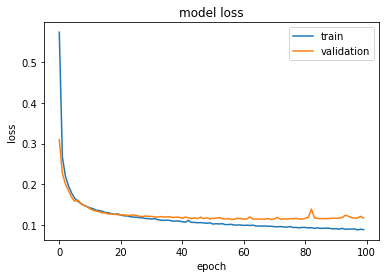

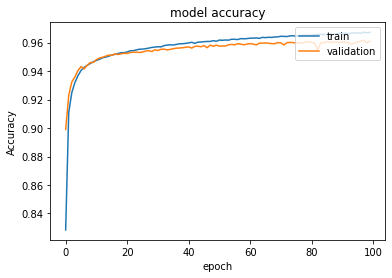

In [ ]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
%matplotlib inline
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

In [ ]:
hgf
# make a prediction
yhat_b = model.predict(X_test_b_3)

In [12]:
y_pred = model.predict(X_test_b_3)
pred_users = np.argmax(y_pred, axis=1)
#pred_users = encoder_y.inverse_transform(y_pred_class)

actual_users = np.argmax(y_test_b, axis=1)
#actual_users = encoder_y.inverse_transform(y)

print(pred_users)
print(actual_users)
diff = pred_users - actual_users
print('Failed Predictions:')
print(actual_users[diff > 0])
print(pred_users[diff > 0])
print('Predcition accuracy:', accuracy_score(actual_users, pred_users))

[34 13 13 ... 21 21 21]
[34 13 13 ... 21 21 21]
Failed Predictions:
[15  4 15 ...  8  7 18]
[17 34 17 ... 10 34 39]
Predcition accuracy: 0.9612557351707807


In [14]:
cnf_matrix = confusion_matrix(actual_users,pred_users)
print(cnf_matrix)
#[[1 1 3]
# [3 2 2]
# [1 3 1]]

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

[[3836    0    0 ...    0    0    0]
 [   0 8487    0 ...    0    0    0]
 [   0    0 5865 ...    0    0    0]
 ...
 [   0    0    0 ... 2961    0    0]
 [   0    0    0 ...    0 4596    0]
 [   0    0    0 ...    0    0 1368]]


In [15]:
# Fall out or false positive rate
print("FAR", np.average(FPR))
# False negative rate
print("FRR", np.average(FNR))

print("max FAR", np.max(FPR))
# False negative rate
print("max FRR", np.max(FNR))

print("min FAR", np.min(FPR))
# False negative rate
print("min FRR", np.min(FNR))

FAR 0.000995446295092504
FRR 0.05126297213897656
max FAR 0.005106164362105369
max FRR 0.2643171806167401
min FAR 0.0
min FRR 0.0


In [16]:
meer=np.mean(FPR==FNR)
meer

0.07317073170731707

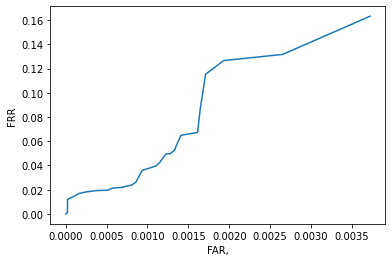

In [ ]:
#pyplot.plot(FPR, FNR, scalex=True, scaley=False)
#pyplot.plot(FNR, label='FRR', scalex=True, scaley=False)
#pyplot.legend()

pyplot.plot(np.sort(FPR),np.sort(FNR)) # Sorted in ascending order
#pyplot.plot(np.sort(FNR)[::-1]) # Sorted in descending order
pyplot.ylabel('FRR')
pyplot.xlabel('FAR,')
pyplot.show()


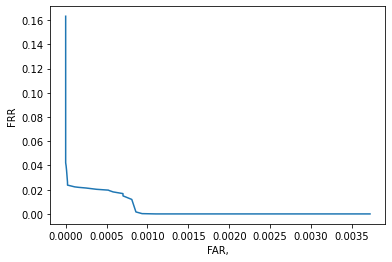

In [ ]:
#pyplot.plot(FPR, FNR, scalex=True, scaley=False)
#pyplot.plot(FNR, label='FRR', scalex=True, scaley=False)
#pyplot.legend()

pyplot.plot(np.sort(FPR),np.sort(FNR)[::-1]) # Sorted in ascending order
#pyplot.plot(np.sort(FNR)[::-1]) # Sorted in descending order
pyplot.ylabel('FRR')
pyplot.xlabel('FAR,')
pyplot.show()


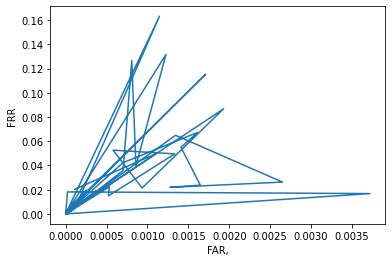

In [ ]:
pyplot.plot(FPR,FNR) # Sorted in ascending order
#pyplot.plot(FNR, marker='o') 
#plt.plot(meer, marker='o') 
#pyplot.title('')
pyplot.ylabel('FRR')
pyplot.xlabel('FAR,')
#pyplot.legend(['FAR', 'FRR'], loc='upper right')

pyplot.show()

In [13]:
#for feature extraction

#2-----------

#split data for enrollment and authentication sample (per user)
def enroll_and_auth_split(data):
    #data=data.values
    #d=data.copy()
    df_enroll,df_auth = data[0:3, :], data[4:10, :]    
    return df_enroll,df_auth

In [18]:
model.layers

In [14]:
#------------get features-------------------    
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K 

def get_features(raw_feature):
    f=raw_feature.copy()
    #Blstm_touchAlytic_w_v2.hd5'
    model.load_weights('Blstm_touchAlytic_w_v2.hd5') 
    #input shape
    #a = Input(shape=(raw_feature.shape[1], raw_feature.shape[2]))
    intermediate_layer_model = Model(inputs=model.input,outputs=model.layers[5].output)
    f = intermediate_layer_model.predict(f)
    
    return f 


In [15]:
#binarization
def binarization_2(featuer,mean,mean_all):
    binary_featuer_all_user=featuer[:]

    for user in range(len(datasets)):
    
        for template in range(len(featuer[user])):
            for w in range(len(featuer[user][template])):
                if mean[user][w]<=mean_all[w]:
                    featuer[user][template][w]=0
                else:
                    featuer[user][template][w]=1
    return featuer

In [16]:
#binarization
def binarization_enrol(featuer,mean,mean_all):
    #binary_featuer_all_user_auth=featuer[:]

    for user in range(len(datasets)):
   
       for template in range(len(featuer[user])):
            for w in range(len(featuer[user][template])):
                if (featuer[user][template][w]<=mean_all[w]):
                    featuer[user][template][w]=0
                else:
                    featuer[user][template][w]=1
    return featuer
        

In [17]:
#group the users in the data base by subject
datasets = {}
by_class = second_data.groupby(second_data['user_id'])

for groups, data in by_class:
    datasets[groups] = data
#or by_class.get_group('A')

In [18]:
import copy

In [19]:
#new

#---------initialization------------------
mean_user_i=[]
mean_all=[]
mean_auth=[]
evector=[]
enroll_featuer_all_user=[]
auth_featuer_all_user=[]
raw_featuers=[]#raw data
y_=[]#class
helpfull_featuers=[]#helpfull featuers

#split the data for enrollment and authentication
for user in datasets:
    
    #get feature colum from dataset
    y_.append(user)
    f=datasets[user].drop(columns=['user_id','phone_id','doc_id']).values
    
    #split data to enrollment and verivication
    #enroll_raw_featuers,auth_raw_features=enroll_and_auth_split(raw_featuers[user])
    
    #preprocessing
    #f = mm_X_scaler.fit_transform(f)
    #Standardize features
    #f3 = standard_scaler.fit_transform(f)
    
    
    #store raw data for user after preprocessing
    raw_featuers.append(f)  
    
    #convert to 3d shape
    f=f.reshape((f.shape[0], 1, f.shape[1]))
    #enroll_raw_featuers = enroll_raw_featuers.reshape((enroll_raw_featuers.shape[0], 1, enroll_raw_featuers.shape[1]))
    #auth_raw_features = auth_raw_features.reshape((auth_raw_features.shape[0], 1, auth_raw_features.shape[1]))
    
    
    #get helpful features from the model
    h=get_features(copy.deepcopy(f))
      
    
    #reshape the features to 2d because the output from BLST is 3d 
    #h=h.reshape(h.shape[0],h.shape[2])
    
     #save featutears
    helpfull_featuers.append(h)
    
    #split data to enrollment and authentication
    #h_f=helpfull_featuers[user].copy()
    enroll_featuers,auth_features=enroll_and_auth_split(h)
    
       
    
    
    
    #----1- find the column mean (mean over intra-class)
    e_f=copy.deepcopy(enroll_featuers)
    aut_f=copy.deepcopy(auth_features)
    mean_user_i.append(np.mean(e_f,axis=0))#per user
    mean_auth.append(np.mean(aut_f,axis=0))#per user
    
    enroll_featuer_all_user.append(enroll_featuers)
    auth_featuer_all_user.append(auth_features)
    
    
    
    #-------------prenciple Component Analysis--------------------
    #----1- find the column mean (mean over intra-class)
    #mean_user_i.append(np.mean(enroll_featuers,axis=0))#per user
    
    #new
    
    #----2-----resize the mean------------------------------
    #repet_mean=np.resize(mean_user_i[user],(280,51))#save to database
    
    
    #----3--Find the mean shifted vector shifted_image by subtracting 
    #the mean vector repet_mean from the feature vector enroll_featuers.
    #enrollment
    #mean_shifted_enrol=enroll_featuers-repet_mean
    
    #verivication
    #mean_shifted_veri=auth_features-repet_mean[0:120,:]
    
    #----4--Calculate the principal component coefficients evector from
    #the feature vector enroll_featuers (iont)-------pca = PCA(n_components=0.9)
    ##https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
    #pca = PCA()
    #evector_enroll= pca.fit_transform(enroll_featuers)#saved to database
    #evector_auth= pca.fit_transform(auth_features)#saved to database
    
    
    #----5- Find the enrolment feature vector enrolment_feature
    #enroll_featuer_all_user.append(evector_enroll*mean_shifted_enrol)
    #auth_featuer_all_user.append(evector_auth*mean_shifted_veri)
    
        
    
    

In [20]:
pip install BitVector

     |████████████████████████████████| 161 kB 7.0 MB/s 
  Created wheel for BitVector: filename=BitVector-3.5.0-py3-none-any.whl size=43509 sha256=34a777c316cc0723b55a889617e626c4cf9e257c701396dc31a7ce7cc51a8621
  Stored in directory: /root/.cache/pip/wheels/6f/6c/b6/c8f6bb33d1e9638df10214d2b08cb70647936dbf4595fabbc3
Successfully built BitVector


In [21]:
from BitVector import BitVector
def list_extractor5(value: list)-> BitVector:
     b=np.array(np.zeros((len(value))))
    #bin(int(a[i]))[2:].zfill(8)
     for i in range(len(value)):
        b[i]=bin(int(value[i]))[2:]#.zfill(8)
    
     return BitVector(bitlist=b)
     #return b

In [22]:
#calculate all mean from all users(mean of mean_suer_template)
mean_user=copy.deepcopy(mean_user_i)
mean_all=np.mean(mean_user,axis=0) 

In [23]:

e_f_all=copy.deepcopy(enroll_featuer_all_user)
auth_f_all=copy.deepcopy(auth_featuer_all_user)

In [24]:
binary_enroll_featuer_all_u=binarization_enrol(e_f_all,mean_user_i,mean_all)
binary_auth_featuer_all_u=binarization_enrol(auth_f_all,mean_auth,mean_all)

In [25]:
pip install  git+https://github.com/cburkert/fuzzy-commitment.git

  Cloning https://github.com/cburkert/fuzzy-commitment.git to /tmp/pip-req-build-z81hhtek
  Running command git clone -q https://github.com/cburkert/fuzzy-commitment.git /tmp/pip-req-build-z81hhtek
     |████████████████████████████████| 55 kB 3.1 MB/s 
  Created wheel for fuzzy-commitment: filename=fuzzy_commitment-1.0.0-py3-none-any.whl size=5948 sha256=ac0bf6e9e554f22407a9101c4d9691d55b9a0e3721b818422f734775b3a5f577
  Stored in directory: /tmp/pip-ephem-wheel-cache-w_vm0psx/wheels/91/b4/09/6083fbf7ce8d93f907a225e4bdb52b39933034020d6a0d0fb4
Successfully built fuzzy-commitment


In [26]:
##-----------fuzzy commitmint with BCH----------------------------------
#import class fcs
import fcs 
#test FAR
#import test_fcs
import secrets

#from BitVector import BitVector

In [27]:
## -----------testing-------------
n=511
e=[1,2,3,4,5]
k_=[502,493,484,475,466]#18
#-----------------------------------
#n=255
#e=[1,2,3,4,5,6,7,8,9,10,10,11,12,13,14,15,18,19,21,22,23,25,26,27,29,30,31,42,43,45,47,55,59,63]#18
#k_=[247,239,231,223,215,207,199,191,187,179,171,163,155,147,139,131,123,115,107,99,91,87,79,71,63,55,47,45,37,29,21,13,9]#18
#----------------------------------------
#n=127
#e=[1,2,3,4,5,6,7,9,10,11,13,14,15,21,22,23,24,25]#18
#k_=[120,113,106,99,85,78,71,64,57,50,43,36,29,22,15,12,10,8]#18

#----------------------------
#n=63
#e=[1,3,4,5,6,7,10,11,15]#18
#k_=[57,45,39,36,30,24,18,16,7]#18
#geneiun and imposter testing
#n=127
#e=[1,2,3,4,5,6,7,9,10,11,13,14,15,21,22,23,24,25]#18
#k_=[120,113,106,99,85,78,71,64,57,50,43,36,29,22,15,8,8,8]#18

#ashwag values
#e=[4,5,6,7,9,10,11,13,14,15,21,22,23,24,25]
#k_=[99,85,78,71,64,57,50,43,36,29,22,15,8]


#far_k = np.zeros((len(k_),6))#create 
far_all=[]
frr_all=[]
print("n     ,     k    ,   t     ,    FAR     ,  FRR    ")
for k in range(len(k_)):
    fa=0
    fr=0
    tn=0 
    tp=0
    far=0
    frr=0
    count_frr_samples=0
    count_far_samples=0
    
    for user in range(len(datasets)):#41
        #cs = fcs.FCS[bytes](4064, e[k])
        cs = fcs.FCS(n, e[k],extractor=list_extractor5)
        key = secrets.token_bytes(k_[k])#random message with length k
        ##key = bytearray(os.urandom(5))
        #key=list_extractor5(np.random.choice([0, 1], size=(k_[k])))#random binary
        
        #template=2
        for template in range(3):#2,3,4,
            #enroll user 
            #bb=rel_binary_enroll[user][template][sort_rel[user][:127]]
            #key = secrets.token_bytes(k_[k])#random message with length k
            rr=binary_enroll_featuer_all_u[user][template][:n]
            #rr.resize(127) #Resize the matrix and fill with zeros
            c = cs.commit(rr,key)
            
            
            
            #genuein test for same user in the enrollment
            for template2 in range(1):#1224
                v1=binary_auth_featuer_all_u[user][template2][:n]
            
            #padding by zeros
            #v1.resize(127)
                result=cs.verify(c,v1)
                count_frr_samples=count_frr_samples+1
                
                if not result:
                    fr+=1
                else:
                    tp+=1
                
                    
            #imposter test# 61200
            for user_imp in range(len(datasets)):#50
                if user_imp!=user:
                    for t in range(1):#3
                        v2=binary_auth_featuer_all_u[user_imp][t][:n]
                    #v2.resize(127)
                        result=cs.verify(c,v2)
                        count_far_samples=count_far_samples+1
                        if result:
                            fa+=1#imposter falsly accepted
                        else:
                            tn+=1#imposter correctly reject
                        

    #print("-------result---------------",k)
    #print("-------n=",127)
    #print("-------k=",k_[k])
    #print("-------t=",e[k])
    far=(fa/count_far_samples)#*100
    far_all.append(far)
    #print("-------FAR=", far)
    frr=(fr/count_frr_samples)#*100
    frr_all.append(frr)
    #print("-------FRR=", frr)
    #print("-------TP=", tp)
    #print("-------TN=", tn)
    #print("-------FP=", fa)
    #print("-------FN=", fr)
    #print("-------frr samples=", count_frr_samples)
    #print("-------far samples=", count_far_samples)
    print(n,",",k_[k] ,",",e[k] ,",%.4f" % far ,",%.4f" % frr)
   

n     ,     k    ,   t     ,    FAR     ,  FRR    
511 , 502 , 1 ,0.0000 ,0.9919
511 , 493 , 2 ,0.0000 ,0.9919
511 , 484 , 3 ,0.0000 ,0.9919
511 , 475 , 4 ,0.0000 ,0.9837
511 , 466 , 5 ,0.0000 ,0.9837


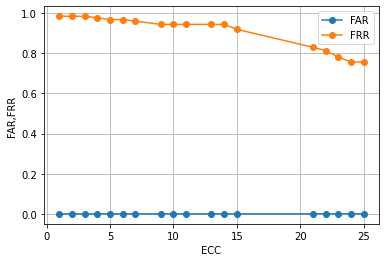

In [33]:
#3 enrollment and 1 authentication sampless
import matplotlib.pyplot as plt 
plt.plot(e,far_all, marker='o') # Sorted in ascending order
plt.plot(e,frr_all, marker='o') 
#plt.plot(meer, marker='o') 
#plt.title('')
plt.ylabel('FAR,FRR')
plt.xlabel('ECC')
plt.legend(['FAR', 'FRR'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.show()

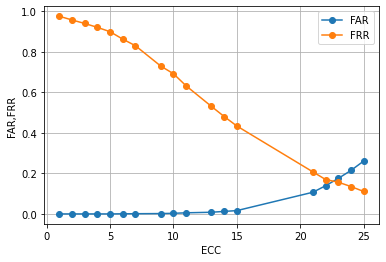

In [ ]:
#8 enrollment and 3 authentication sampless
plt.plot(e,far_all, marker='o') # Sorted in ascending order
plt.plot(e,frr_all, marker='o') 
#plt.plot(meer, marker='o') 
#plt.title('')
plt.ylabel('FAR,FRR')
plt.xlabel('ECC')
plt.legend(['FAR', 'FRR'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.show()

n     ,     k    ,   t     ,    FAR     ,  FRR    
127 , 120 , 1 ,0.0000 ,0.9756
127 , 113 , 2 ,0.0000 ,0.9573
127 , 106 , 3 ,0.0000 ,0.9400
127 , 99 , 4 ,0.0000 ,0.9207
127 , 85 , 5 ,0.0000 ,0.8994
127 , 78 , 6 ,0.0005 ,0.8628
127 , 71 , 7 ,0.0010 ,0.8303
127 , 64 , 9 ,0.0017 ,0.7297
127 , 57 , 10 ,0.0030 ,0.6921
127 , 50 , 11 ,0.0055 ,0.6321
127 , 43 , 13 ,0.0082 ,0.5305
127 , 36 , 14 ,0.0124 ,0.4807
127 , 29 , 15 ,0.0163 ,0.4339
127 , 22 , 21 ,0.1070 ,0.2073
127 , 15 , 22 ,0.1391 ,0.1697
127 , 12 , 23 ,0.1753 ,0.1565
127 , 10 , 24 ,0.2147 ,0.1352
127 , 8 , 25 ,0.2608 ,0.1108

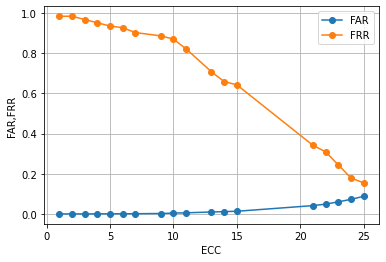

In [ ]:
#mean of 50 samples in the enrollment and 3 authentication sampless
plt.plot(e,far_all, marker='o') # Sorted in ascending order
plt.plot(e,frr_all, marker='o') 
#plt.plot(meer, marker='o') 
#plt.title('')
plt.ylabel('FAR,FRR')
plt.xlabel('ECC')
plt.legend(['FAR', 'FRR'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.show()

n     ,     k    ,   t     ,    FAR     ,  FRR    
127 , 120 , 1 ,0.0000 ,0.9837
127 , 113 , 2 ,0.0000 ,0.9837
127 , 106 , 3 ,0.0000 ,0.9675
127 , 99 , 4 ,0.0002 ,0.9512
127 , 85 , 5 ,0.0006 ,0.9350
127 , 78 , 6 ,0.0006 ,0.9268
127 , 71 , 7 ,0.0010 ,0.9024
127 , 64 , 9 ,0.0020 ,0.8862
127 , 57 , 10 ,0.0041 ,0.8699
127 , 50 , 11 ,0.0055 ,0.8211
127 , 43 , 13 ,0.0096 ,0.7073
127 , 36 , 14 ,0.0114 ,0.6585
127 , 29 , 15 ,0.0132 ,0.6423
127 , 22 , 21 ,0.0413 ,0.3415
127 , 15 , 22 ,0.0488 ,0.3089
127 , 12 , 23 ,0.0600 ,0.2439
127 , 10 , 24 ,0.0726 ,0.1789
127 , 8 , 25 ,0.0876 ,0.1545

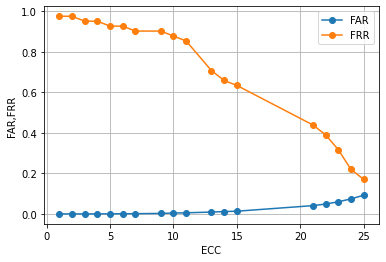

In [ ]:
#mean of 50 samples for enrollment and 1 samples for auth
plt.plot(e,far_all, marker='o') # Sorted in ascending order
plt.plot(e,frr_all, marker='o') 
#plt.plot(meer, marker='o') 
#plt.title('')
plt.ylabel('FAR,FRR')
plt.xlabel('ECC')
plt.legend(['FAR', 'FRR'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.show()

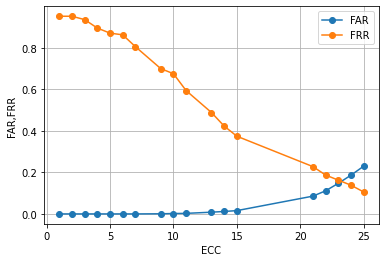

In [ ]:
#3 enrollment samples and 1 auth
import matplotlib.pyplot as plt 
#meer=np.mean(far_all==frr_all)
plt.plot(e,far_all, marker='o') # Sorted in ascending order
plt.plot(e,frr_all, marker='o') 
#plt.plot(meer, marker='o') 
#plt.title('')
plt.ylabel('FAR,FRR')
plt.xlabel('ECC')
plt.legend(['FAR', 'FRR'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.show()

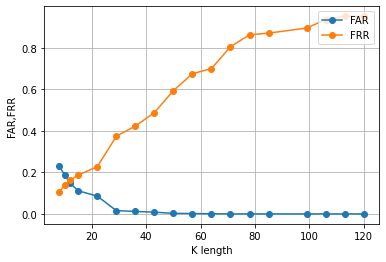

In [ ]:
plt.plot(k_,far_all, marker='o') # Sorted in ascending order
plt.plot(k_,frr_all, marker='o') 
#plt.plot(meer, marker='o') 
#plt.title('')
plt.ylabel('FAR,FRR')
plt.xlabel('K length')
plt.legend(['FAR', 'FRR'], loc='upper right')
plt.grid(b=None, which='major', axis='both')

plt.show()

In [ ]:
#-----------2testing fuzzy extrctor with fcs preprocess-------------
#geneiun and imposter testing
from fuzzy_extractor import FuzzyExtractor
e_hc=[1,2,3,4,5,6,7,9,10,11,13,14,15,21,22,23,24,25]#18
k_hc=[120,113,106,99,85,78,71,64,57,50,43,36,29,22,15,12,10,8]#18
#k_hc=[120,113,106,99,92,85,78,71,64,57,50,43,36]#,130,250,280,290]#,60,100,150,200,250]
#e_hc=[1,2,3,4,5,6,7,9,10,11,13,14,15,21,22,23,24,25]
#far_k = np.zeros((len(k_),6))#create 
far_all=[]
frr_all=[]
cc=[]
r=[]
for k in range(len(e_hc)):
    fa=0
    fr=0
    tn=0 
    tp=0
    far=0
    frr=0
    count_frr_samples=0
    count_far_samples=0
    
    for user in range(len(datasets)):
    
        for template in range(7):
            #enroll user
            #extractor = FuzzyExtractor(len(val), 1, hash_func='sha512', sec_len=3, nonce_len=32)
            extractor = FuzzyExtractor(127, e_hc[k])
            temp = list_extractor5(rel_binary_enroll[user][template][:127])
       
            key, helper = extractor.generate(temp)
            #c = cs.commit(rel_binary_enroll[user][template][sort_rel[:]]) 
            
            
            #genuein test for same user in the enrollment
            for template2 in range(1):
              a1=list_extractor5(rel_binary_auth[user][template2][:127])
            #a1.resize(127)
            #extractor.reproduce(value, helpers) == key
              result=(extractor.reproduce(a1, helper)== key)
              if not result:
                  fr+=1
              else:
                  tp+=1
              count_frr_samples=count_frr_samples+1
                    
         #imposter test
            for user_imp in range(len(datasets)):
              if user_imp!=user:
                  for t in range(1):
                      a2=list_extractor5(rel_binary_auth[user_imp][t][:127])
                        #a2.resize(127)
                      result=(extractor.reproduce(a2, helper)== key)
                      if result:
                          fa+=1#imposter falsly accepted
                      else:
                          tn+=1#imposter correctly reject
                      count_far_samples=count_far_samples+1

    #print("-------result---------------",k+1)
    #print("-------n=",70)
    #print("-------k=",k_hc[k])
    #print("-------t=",e_hc[k])
    far=(fa/count_far_samples)*100
    far_all.append(far)
    #print("-------FAR=", far)
    frr=(fr/count_frr_samples)*100
    frr_all.append(frr)
    #print("-------FRR=", frr)
    #print("-------TP=", tp)
    #print("-------TN=", tn)
    #print("-------frr samples=", count_frr_samples)
    #print("-------far samples=", count_far_samples)
    print(n,",",k_[k] ,",",e[k] ,",%.4f" % far ,",%.4f" % frr)

# Fall out or false positive rate
print("avg FAR", np.average(far_all))
# False negative rate
print("avg FRR", np.average(frr_all))

print("max FAR", np.max(far_all))
# False negative rate
print("max FRR", np.max(frr_all))

print("min FAR", np.min(far_all))
# False negative rate
print("min FRR", np.min(frr_all))    
    

127 , 120 , 1 ,0.1307 ,87.4564
127 , 113 , 2 ,0.1742 ,83.9721
127 , 106 , 3 ,0.4878 ,76.3066
127 , 99 , 4 ,0.6620 ,71.0801
127 , 85 , 5 ,1.0453 ,66.2021
127 , 78 , 6 ,1.6376 ,63.0662
127 , 71 , 7 ,2.3171 ,58.8850


In [ ]:

# Fall out or false positive rate
print("avg FAR", np.average(far_all))
# False negative rate
print("avg FRR", np.average(frr_all))

print("max FAR", np.max(far_all))
# False negative rate
print("max FRR", np.max(frr_all))

print("min FAR", np.min(far_all))
# False negative rate
print("min FRR", np.min(frr_all))